In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'train_images', 'test_images']


In [2]:
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_train.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [4]:
df_train['diagnosis'].value_counts()/len(df_train)

0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64

In [5]:
def load_dataset(path):
    eye_files = os.listdir(path)
    return eye_files

In [6]:
train_files = load_dataset('../input/train_images')
test_files = load_dataset('../input/test_images')

In [7]:
dis_classes = df_train['diagnosis'].unique()

In [8]:
print('There are %d total disease categories' %len(dis_classes))
print('There are %s total eye images. \n' % len(np.hstack([train_files, test_files])))
print('There are %d training eye images. \n' % len(train_files))
print('There are %d test eye images. \n' % len(test_files))

There are 5 total disease categories
There are 5590 total eye images. 

There are 3662 training eye images. 

There are 1928 test eye images. 



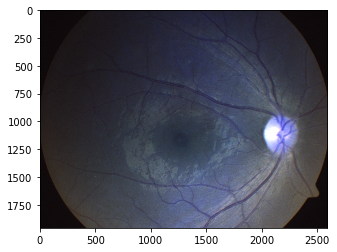

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

train_files = np.array(glob("../input/train_images/*"))
test_files = np.array(glob("../input/test_images/*"))
img = cv2.imread(train_files[1])
plt.imshow(img)
plt.show()


In [10]:
train_files[1]

'../input/train_images/cd01672507c9.png'

In [11]:
df_train[df_train.id_code == 'cd01672507c9']

id_code  diagnosis
2952  cd01672507c9          0

c97472ef2c66.png            id_code  diagnosis
2897  c97472ef2c66          0


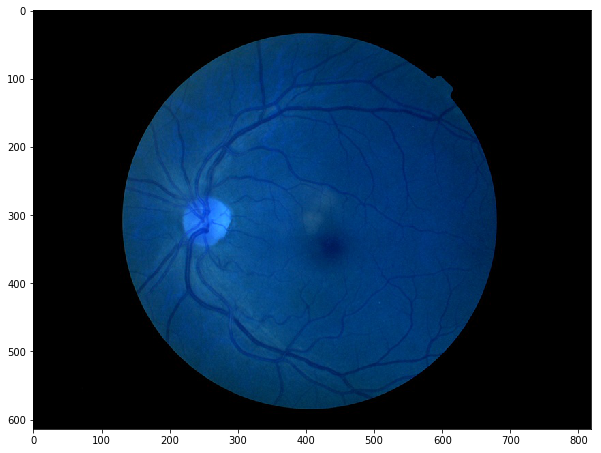

1bea04b2bb2d.png           id_code  diagnosis
377  1bea04b2bb2d          2


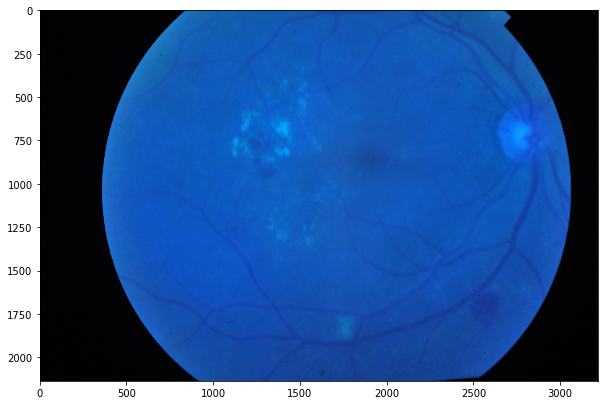

c80f79579fed.png            id_code  diagnosis
2883  c80f79579fed          2


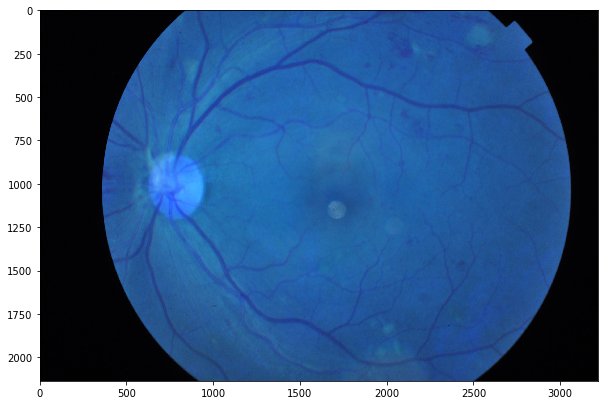

c98f623d08d1.png            id_code  diagnosis
2898  c98f623d08d1          0


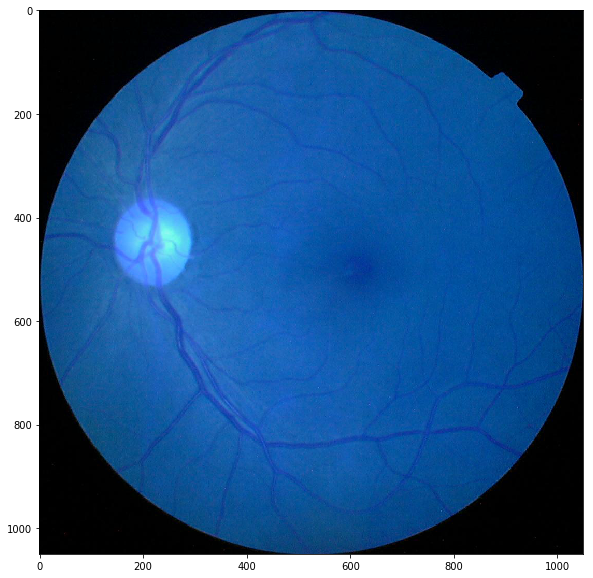

da1fb35f5df9.png            id_code  diagnosis
3145  da1fb35f5df9          1


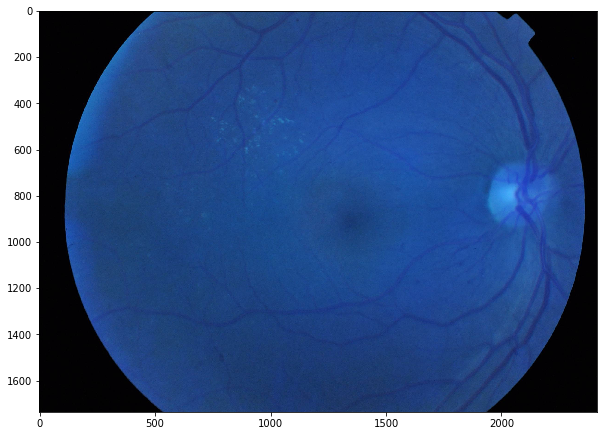

96d48b073f18.png            id_code  diagnosis
2140  96d48b073f18          2


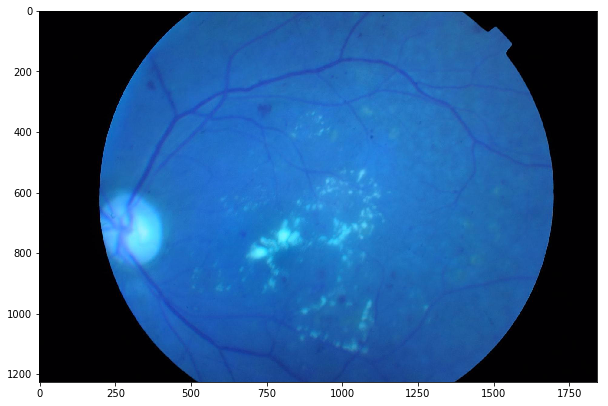

93a1b984de84.png            id_code  diagnosis
2103  93a1b984de84          0


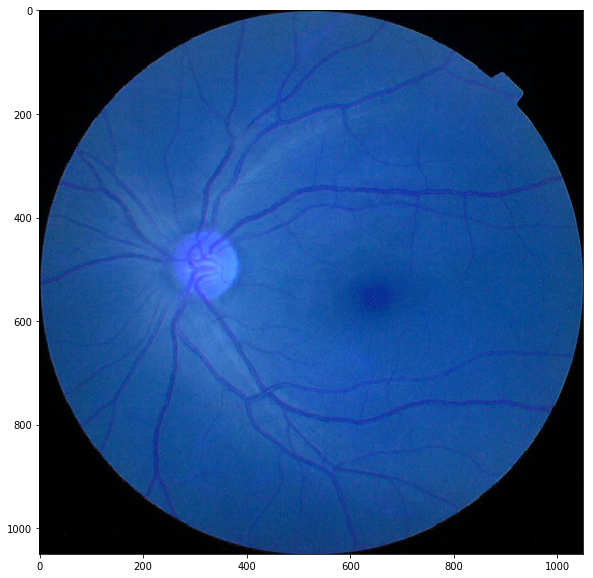

b49b2fac2514.png            id_code  diagnosis
2600  b49b2fac2514          4


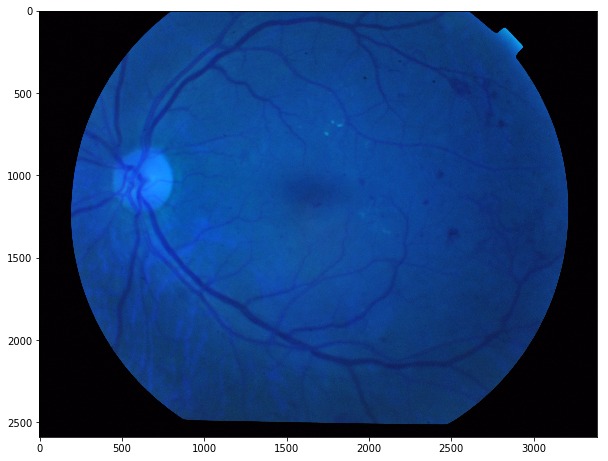

f4874247ede6.png            id_code  diagnosis
3510  f4874247ede6          0


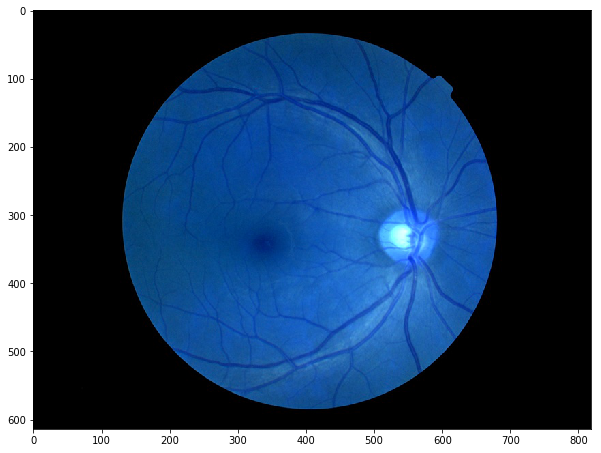

ac720570dd0f.png            id_code  diagnosis
2486  ac720570dd0f          2


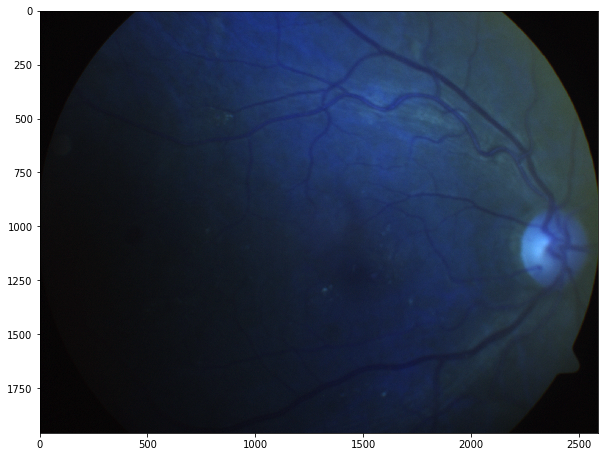

In [12]:
import random
for i in range(10):
    plt.figure(figsize=(10,10))
    i = random.choice(os.listdir('../input/train_images'))
    i_c = i.split('.')[0]
    #print(os.path.join('../input/train_images', i))
    img = cv2.imread(os.path.join('../input/train_images', i))
    print(i, df_train[df_train.id_code == i_c])
    plt.imshow(img)
    plt.show()

# Feature Extraction

In [13]:
def ed_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [14]:
gray = cv2.cvtColor(cv2.imread('../input/train_images/3e61703b5ab2.png'), cv2.COLOR_BGR2GRAY)

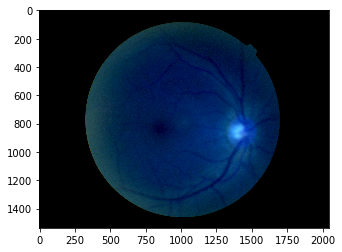

In [15]:
image=cv2.imread('../input/train_images/3e61703b5ab2.png')
plt.imshow(image)

In [16]:
bins= 8
def ed_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0,1,2], None, [bins,bins,bins],[0,256,0,256,0,256,] )
    cv2.normalize(hist,hist)
    return hist.flatten()

In [17]:
ed_histogram(image)

array([8.64541948e-01, 2.12207533e-06, 5.30518832e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.12207533e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.06103766e-06,
       3.18311299e-06, 1.06103766e-06, 1.37934894e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.59155650e-06, 2.01597159e-05, 8.39280779e-04, 2.12207533e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.16714145e-05, 3.66057997e-04, 1.13546941e-02, 3.39532053e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.97889125e-05, 2.41386076e-03, 3.45017612e-02, 9.33713163e-05,
       0.00000000e+00, 0.00000000e+00, 3.50142436e-05, 2.24568625e-03,
       4.82772120e-05, 5.01181139e-03, 4.08701114e-02, 5.62349975e-04,
       1.01965724e-03, 9.36365745e-04, 2.38627382e-03, 1.76981080e-03,
      

In [18]:
dis_classes

array([2, 4, 1, 0, 3])

In [19]:
labels=[]
global_features=[]
for x in train_files:
    image = cv2.imread(x)
    
    x_c = x.split('.')[2].split('/')[3]
    current_label =  np.array(df_train.loc[df_train.id_code == x_c,'diagnosis'])
    labels.append(current_label)
    
    fv_hu_moments = ed_hu_moments(image)
    fv_histogram = ed_histogram(image)
    
    global_feature = np.hstack([fv_hu_moments,fv_histogram])
    global_features.append(global_feature)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler(feature_range=(0,1))
scaled_features=scaler.fit_transform(np.array(global_features))

le = LabelEncoder()
target = le.fit_transform(labels)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression(multi_class='ovr')
model2 = RandomForestClassifier()


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
model1.fit(global_features,labels)
model2.fit(global_features,labels)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
print(model1.score(global_features, labels))
print(model2.score(global_features, labels))

0.7012561441835062
0.9765155652648826


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




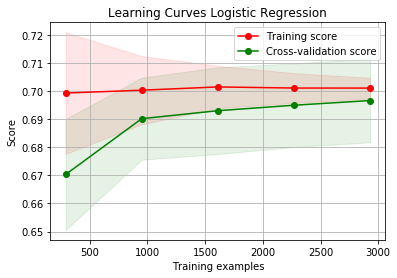

In [24]:
title = r"Learning Curves Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model1, title, global_features, labels, cv=cv, n_jobs=4)

plt.show()

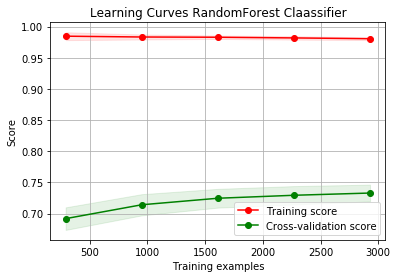

In [25]:
title = r"Learning Curves RandomForest Claassifier"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model2, title, global_features, labels, cv=cv, n_jobs=4)

plt.show()

In [26]:
id_cds=[]
type(id_cds)

list

In [27]:
test_features = []
id_cds = []
for x in test_files:
    image = cv2.imread(x)
    
    x_c = x.split('.')[2].split('/')[3]
    id_cds.append(x_c)
    
    fv_hu_moments = ed_hu_moments(image)
    fv_histogram = ed_histogram(image)
    
    test_feature = np.hstack([fv_hu_moments,fv_histogram])
    test_features.append(test_feature)
    

In [28]:
test_preds = model2.predict(test_features)

In [29]:
combined_results = pd.DataFrame({'id_code': id_cds, 'diagnosis': test_preds})

In [30]:
combined_results.head()

id_code  diagnosis
0  3d4d693f7983          2
1  bc9d8ac89c82          2
2  ab59dfa8dfa2          2
3  d8ebfa3568ac          1
4  1e0309115a25          2

In [31]:
combined_results.shape

(1928, 2)

In [32]:
combined_results.to_csv("submission.csv",index=False)